# Exercício Gráfico Fluxo.
Vocês vão utilizar um dos tipos de gráfico do tipo Fluxo (Flow).  
  
Referência: https://www.python-graph-gallery.com/  
  
Em grupo vocês devem decidir qual base aberta vão utilizar para fazer uma demonstracão de um fluxo de dados.  
  
No final da aula de hoje vocês devem ter decidido qual base utilizar e se possível uma tentatativa de como utilizar um dos gráficos de Fluxo.  
  
  
Ao final da atividade todos devem responde o formulário:  
https://docs.google.com/forms/d/1ymJ3R0-M8hTN4zVlAAaGF5vQ_gd9HSfQY6olZJPMuUU

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./trip.csv', sep=',')
df = df.drop_duplicates(subset=['trip_id'])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236065 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            236065 non-null  int64  
 1   starttime          236065 non-null  object 
 2   stoptime           236065 non-null  object 
 3   bikeid             236065 non-null  object 
 4   tripduration       236065 non-null  float64
 5   from_station_name  236065 non-null  object 
 6   to_station_name    236065 non-null  object 
 7   from_station_id    236065 non-null  object 
 8   to_station_id      236065 non-null  object 
 9   usertype           236064 non-null  object 
 10  gender             146171 non-null  object 
 11  birthyear          146167 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 23.4+ MB


In [4]:
df['from_station_id'].unique()

array(['CBD-06', 'PS-04', 'CBD-07', 'PS-05', 'CBD-05', 'CH-02', 'DPD-01',
       'UD-01', 'WF-04', 'BT-04', 'UW-02', 'BT-03', 'ID-04', 'UD-02',
       'UD-04', 'CBD-13', 'FH-01', 'CH-09', 'SLU-15', 'SLU-18', 'UW-10',
       'CH-15', 'BT-05', 'SLU-01', 'UD-07', 'CBD-03', 'CH-08', 'UW-07',
       'SLU-19', 'DPD-03', 'WF-01', 'CH-05', 'SLU-02', 'CH-07', 'UW-06',
       'UW-04', 'SLU-17', 'EL-01', 'EL-05', 'CH-06', 'SLU-04', 'BT-01',
       'CH-01', 'CH-03', 'CH-12', 'EL-03', 'FH-04', 'SLU-07', 'SLU-16',
       'UW-01', 'CD-01', 'Pronto shop', 'SLU-20', 'CBD-04', 'SLU-21',
       'UW-11', 'CH-16', 'Pronto shop 2', 'SLU-22', 'WF-03', '8D OPS 02'],
      dtype=object)

In [5]:
# bad_stations = ['Pronto shop', 'Pronto shop 2','8D OPS 02']
# mascara_from = df['from_station_id'].isin(bad_stations)
# mascara_to = df['to_station_id'].isin(bad_stations)

# df = df[~mascara_from & ~mascara_to]

In [6]:
df[['from_station_id','to_station_id']]

,from_station_id,to_station_id
0,CBD-06,PS-04
1,CBD-06,PS-04
2,CBD-06,PS-04
3,CBD-06,PS-04
4,CBD-06,PS-04
...,...,...
286853,CH-09,CBD-06
286854,CH-08,ID-04
286855,CH-08,ID-04
286856,CH-08,ID-04


In [7]:
crosstab_df = pd.crosstab(df['from_station_id'], df['to_station_id'])

In [8]:
crosstab_df

to_station_id,8D OPS 02,BT-01,BT-03,BT-04,BT-05,CBD-03,CBD-04,CBD-05,CBD-06,CBD-07,...,UW-01,UW-02,UW-04,UW-06,UW-07,UW-10,UW-11,WF-01,WF-03,WF-04
from_station_id,,,,,,,,,,,,,,,,,,,,,
8D OPS 02,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BT-01,0,627,182,114,403,179,135,236,743,104,...,3,1,21,4,2,4,3,777,13,792
BT-03,0,301,284,79,204,187,91,365,363,54,...,0,0,17,0,1,6,0,237,6,172
BT-04,0,178,106,146,60,72,55,265,101,41,...,0,0,5,0,1,4,1,98,1,42
BT-05,0,373,154,77,220,166,67,192,193,59,...,0,2,6,2,2,2,0,184,1,93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UW-10,0,0,2,1,2,0,0,2,0,0,...,12,15,60,30,78,215,13,6,0,4
UW-11,0,0,1,1,0,1,1,0,0,0,...,0,25,59,18,37,15,92,1,0,0
WF-01,0,347,104,32,132,128,42,814,208,61,...,0,1,11,0,3,8,3,4209,19,2291


In [9]:
## DESCONSIDERAR
df.groupby(['from_station_id', 'to_station_id']).size().to_frame()\
    .sort_values(by=0,ascending=False).head(10).reset_index().pivot(index='from_station_id', columns='to_station_id')

0                                                    
to_station_id    BT-01  CBD-13  PS-05 SLU-16 SLU-17  UD-01   WF-01   WF-04
from_station_id                                                           
BT-01              NaN  1101.0    NaN    NaN    NaN    NaN     NaN     NaN
CBD-13           962.0     NaN    NaN    NaN    NaN    NaN     NaN     NaN
CH-07              NaN     NaN    NaN  934.0    NaN    NaN     NaN     NaN
SLU-17             NaN     NaN    NaN    NaN  960.0    NaN     NaN     NaN
UD-01              NaN     NaN    NaN    NaN    NaN  880.0     NaN     NaN
WF-01              NaN     NaN  962.0    NaN    NaN    NaN  4209.0  2291.0
WF-04              NaN     NaN    NaN    NaN    NaN    NaN  1605.0  1150.0

In [10]:
top_10_estacoes = df.groupby(['from_station_id', 'to_station_id']).size().to_frame().nlargest(10, 0).reset_index()

In [11]:
top_10_estacoes

,from_station_id,to_station_id,0
0,WF-01,WF-01,4209
1,WF-01,WF-04,2291
2,WF-04,WF-01,1605
3,WF-04,WF-04,1150
4,BT-01,CBD-13,1101
5,CBD-13,BT-01,962
6,WF-01,PS-05,962
7,SLU-17,SLU-17,960
8,CH-07,SLU-16,934
9,UD-01,UD-01,880


In [12]:
from_station_mask = top_10_estacoes['from_station_id'].unique()
to_station_mask = top_10_estacoes['to_station_id'].unique()

In [13]:
set(from_station_mask)

{'BT-01', 'CBD-13', 'CH-07', 'SLU-17', 'UD-01', 'WF-01', 'WF-04'}

In [14]:
to_station_mask

array(['WF-01', 'WF-04', 'CBD-13', 'BT-01', 'PS-05', 'SLU-17', 'SLU-16',
       'UD-01'], dtype=object)

In [15]:
[*to_station_mask, *from_station_mask]

['WF-01',
 'WF-04',
 'CBD-13',
 'BT-01',
 'PS-05',
 'SLU-17',
 'SLU-16',
 'UD-01',
 'WF-01',
 'WF-04',
 'BT-01',
 'CBD-13',
 'SLU-17',
 'CH-07',
 'UD-01']

In [16]:
union_stations = set([*from_station_mask, *to_station_mask])

In [17]:
union_stations

{'BT-01',
 'CBD-13',
 'CH-07',
 'PS-05',
 'SLU-16',
 'SLU-17',
 'UD-01',
 'WF-01',
 'WF-04'}

In [18]:
matrix_data = crosstab_df.loc[union_stations,union_stations]

## Chord >:(

In [19]:
# !pip install chord
# !pip install requests

In [20]:
import requests
import numpy as np
from chord import Chord

In [21]:
matrix_data.values.tolist()

[[960, 97, 264, 53, 5, 31, 70, 25, 135],
 [75, 4209, 347, 52, 3, 962, 2291, 4, 310],
 [175, 777, 627, 151, 16, 301, 792, 8, 1101],
 [73, 65, 166, 186, 98, 65, 68, 4, 344],
 [19, 23, 198, 934, 233, 71, 23, 15, 577],
 [26, 737, 179, 42, 26, 185, 181, 0, 199],
 [17, 1605, 478, 36, 2, 215, 1150, 4, 137],
 [46, 1, 6, 2, 3, 1, 0, 880, 9],
 [105, 384, 962, 158, 53, 384, 158, 1, 427]]

In [22]:
Chord(matrix_data.values.tolist(), list(union_stations)).to_html('./chord.html')

## Plotly

In [23]:
# !pip install plotly

## MNE :))))))))

In [24]:
!pip install mne

In [25]:
from mne.viz import plot_connectivity_circle

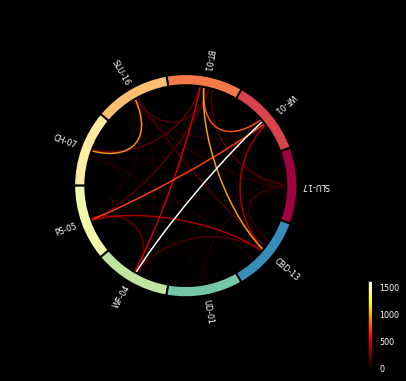

In [32]:
fig, axes = plot_connectivity_circle(matrix_data.to_numpy(), list(union_stations)) 

In [33]:
matrix_data

to_station_id,SLU-17,WF-01,BT-01,SLU-16,CH-07,PS-05,WF-04,UD-01,CBD-13
from_station_id,,,,,,,,,
SLU-17,960,97,264,53,5,31,70,25,135
WF-01,75,4209,347,52,3,962,2291,4,310
BT-01,175,777,627,151,16,301,792,8,1101
SLU-16,73,65,166,186,98,65,68,4,344
CH-07,19,23,198,934,233,71,23,15,577
PS-05,26,737,179,42,26,185,181,0,199
WF-04,17,1605,478,36,2,215,1150,4,137
UD-01,46,1,6,2,3,1,0,880,9
CBD-13,105,384,962,158,53,384,158,1,427
